# Bike Sharing Assignment

### Business Goal:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

You are required to model the demand for shared bikes with the available independent variables. 
It will be used by the management to understand how exactly the demands vary with different features. 
They can accordingly manipulate the business strategy to meet the demand levels and meet the customer expectations. 
Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## 1. Importing Libraries and Filtering warnings

In [1]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from math import sqrt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## 2. Reading and Inspecting Bike Sharing Dataset

### 2.1. Reading Dataset
Reading Bike Sharing dataset 'day.csv' and storing it in a dataframe.
It contains the daily updates for year 2018 and 2019 for BoomBikes.

In [3]:
# Reading 'day.csv' dataset.
boom_bikes = pd.read_csv('day.csv')

In [4]:
# Setting display options for rows and columns.
pd.set_option('display.max_columns',250) # To display all columns
pd.set_option('display.max_rows',250) # To display rows
pd.set_option('display.width',1000) # To set display width

### 2.2. Inspecting Dataframe

Inspecting the dataframes for dimensions, null-values, and summary of different numeric columns.

In [5]:
boom_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# Checking the number of rows and columns in the dataframe
boom_bikes.shape

(730, 16)

In [7]:
# Checking the column-wise info of the dataframe
boom_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# Checking basic statistics of dataframe
boom_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


From above inspection we can observe below points:
- It has 730 rows and 16 columns.
- There are no missing values.

## 3. Data Preparation for boom_bikes dataframe

- Cleaning dataframe
- Analyzing dataframe
- Creating dummies wherever needed

### 3.1. Dropping columns that are not necessary

- 'instant' is just a row instance identifier.
- 'dteday' is removed as we already have some of date features like month, year and weekday already in other columns, so keeping dteday column will be redundant information. Also, for this analysis day to day trend in demand for bikes is not required.
- 'casual' and 'registered' variables are redundant as these describe the target variable 'cnt' in a very trivial way target('cnt') = 'casual' + 'registered', which leads to data leakage.

In [9]:
#Before dropping date, let us introduce a days_old variable which indicates how old is the business
boom_bikes['days_old'] = (pd.to_datetime(boom_bikes['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [10]:
boom_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [11]:
# Dropping instant column as it is index column.
boom_bikes.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns.
boom_bikes.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columns as we have cnt column which is sum of both.
boom_bikes.drop(['casual'], axis = 1, inplace = True)
boom_bikes.drop(['registered'], axis = 1, inplace = True)

In [12]:
boom_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [13]:
boom_bikes.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [14]:
boom_bikes.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

### 3.2. Checking for Outliers

In [15]:
boom_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


In [16]:
boom_bikes.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old'], dtype='object')

In [17]:
#Number of unique values in all columns
boom_bikes.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_old      730
dtype: int64

#### OBSERVATION
We can see that 'season', 'mnth', 'weekday', 'weathersit' all are categorical variables. Hence, need to be replaced with proper values.

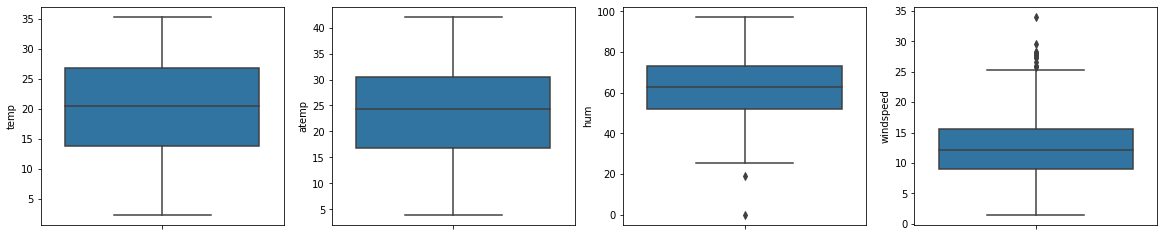

In [18]:
# Drawing box plots for checking independent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(20,4))
i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=boom_bikes)
    i+=1

From above plots we can say that no outliers need to be handled for the given data.

## 4. Data Analysis

### 4.1. Converting numerical to categorical values with appropriate values

Converting 'season', 'mnth', 'weekday', 'weathersit' to categorical types

In [19]:
boom_bikes.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

boom_bikes.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

boom_bikes.mnth = boom_bikes.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

boom_bikes.weekday = boom_bikes.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
boom_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


In [20]:
# Checking correlation between variables
boom_bikes.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old
yr,1.000000,0.008195,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
holiday,0.008195,1.000000,-0.257009,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
workingday,-0.011852,-0.257009,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.027640,-0.015171
temp,0.048789,-0.028764,0.002044,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,0.047215,-0.032703,0.010657,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
hum,-0.112547,-0.015662,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080
windspeed,-0.011624,0.006257,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.235132,-0.112667
cnt,0.569728,-0.068764,-0.027640,0.627044,0.630685,-0.098543,-0.235132,1.000000,0.629896
days_old,0.866026,0.016275,-0.015171,0.150738,0.152773,0.016080,-0.112667,0.629896,1.000000


Text(0.5, 1.0, 'Correlation between variables for bike sharing dataframe')

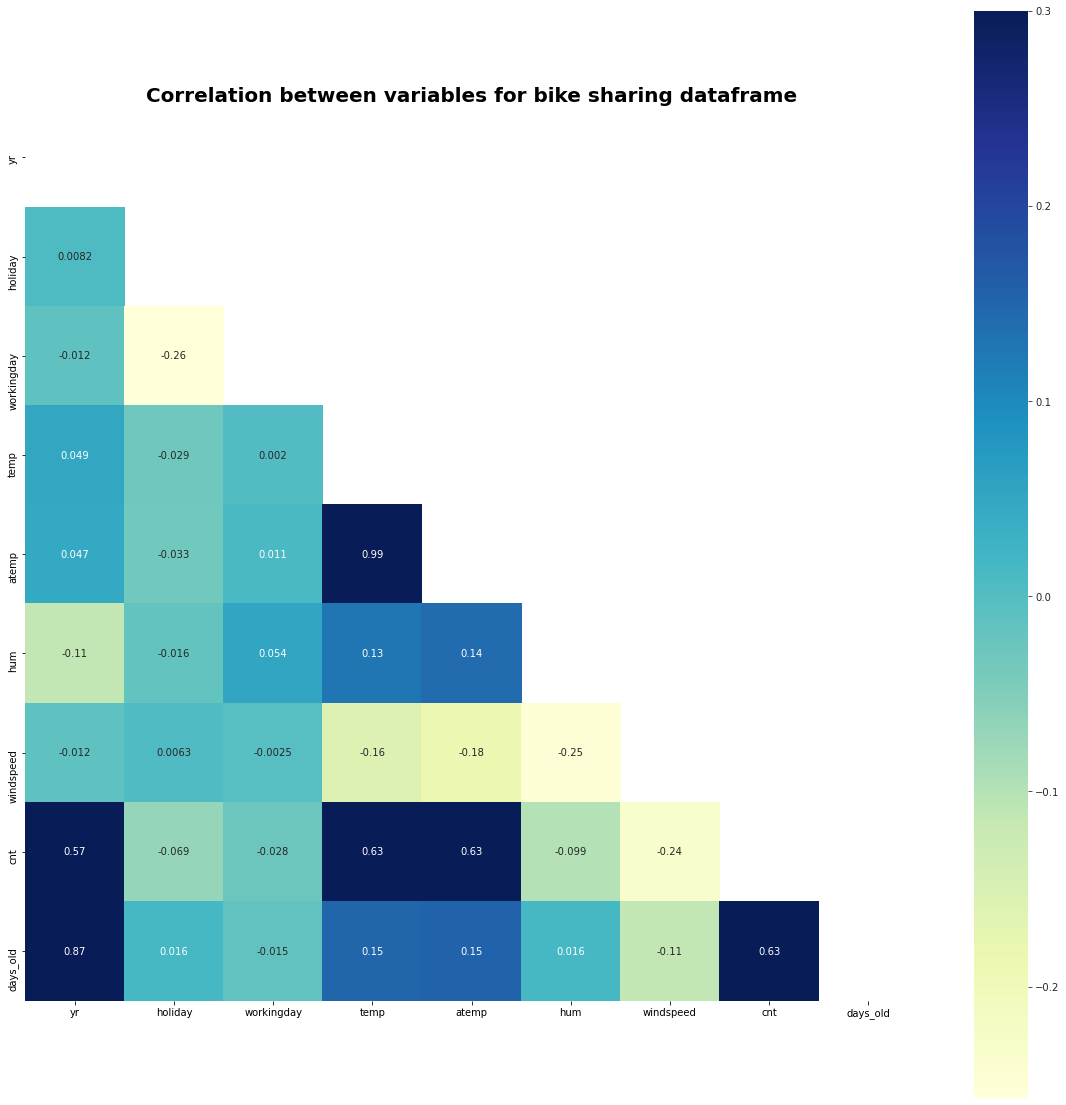

In [21]:
corr=boom_bikes[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old']].corr(method = 'pearson')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20,20))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, vmax=.3, cmap='YlGnBu', annot=True, mask=mask, square=True)
plt.title('Correlation between variables for bike sharing dataframe', fontsize=20, fontweight='bold')

### 4.2. Analysis for Numerical Variables

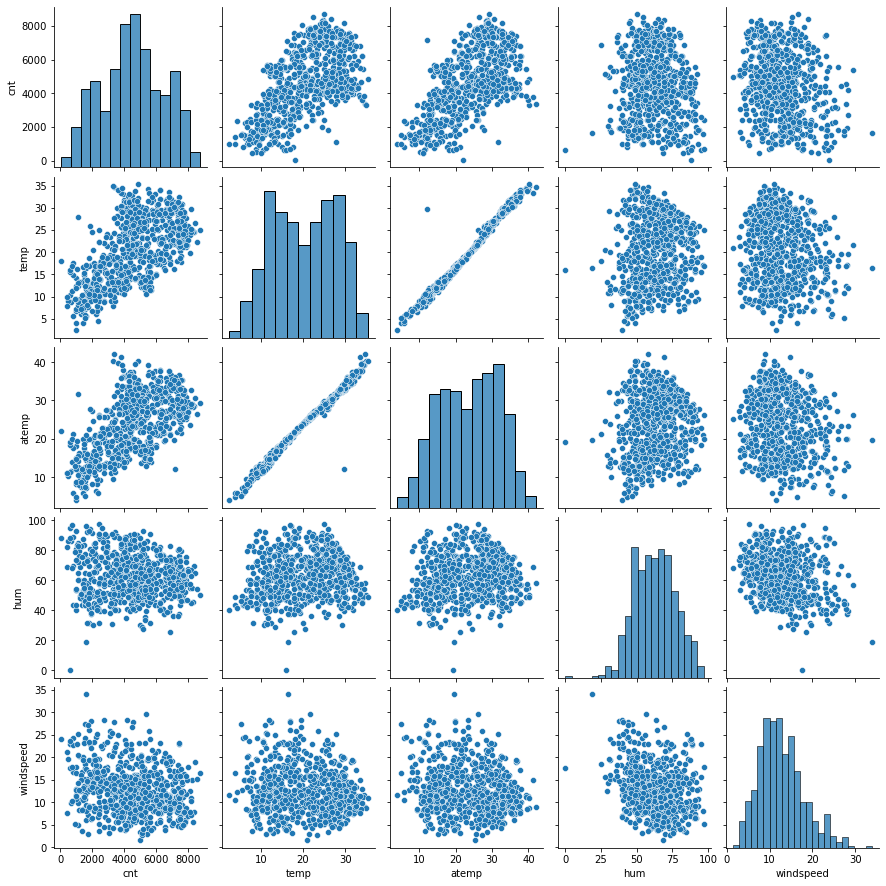

In [22]:
sns.pairplot(data=boom_bikes,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

#### OBSERVATION
From above graphs we can say that 'temp' and 'atemp' are highly correlated and have a linear relationship.
Also, 'temp' and 'atemp' have a similar correlation with target variable may be one of them can be eliminated. However, lets elminate it based on the Variance Inflation Factor later during the model building.

### 4.3. Analysis for Categorical Variables

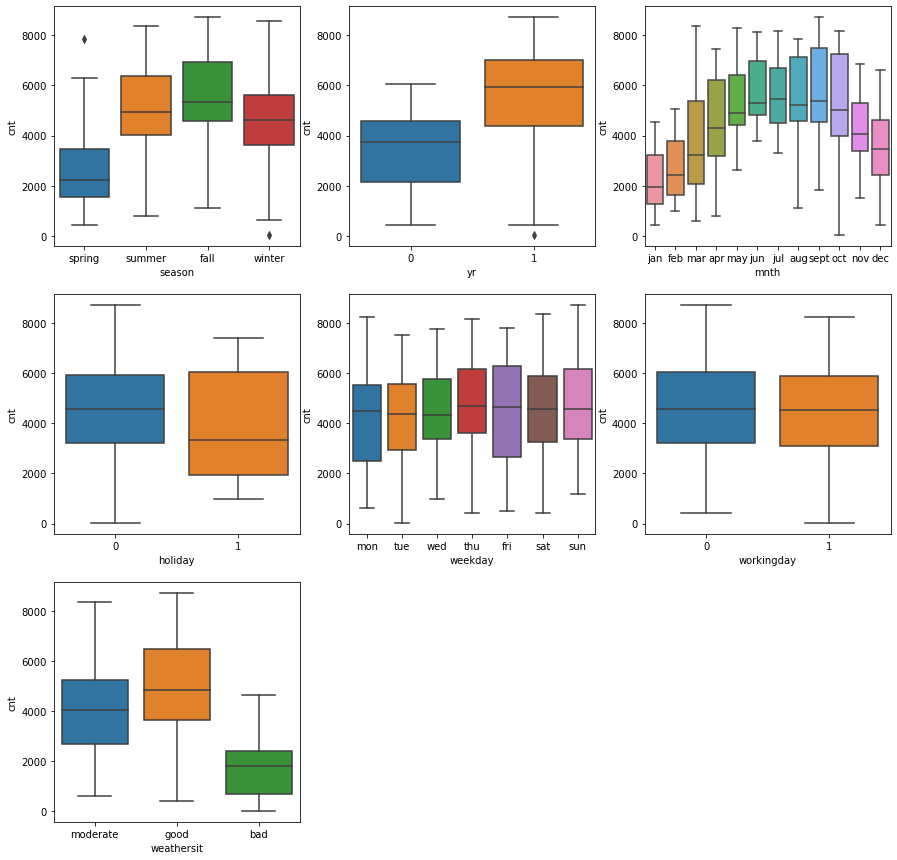

In [23]:
# Boxplot for categorical variables to see demands
cat_vars = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(cat_vars):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=boom_bikes, x=i[1], y='cnt')
plt.show()

#### OBSERVATIONS
Insights that can be drawn from above plots:

1. Season: 3:fall has highest demand for rental bikes.
2. Demand for next year has grown.
3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is        decreasing.
4. Whenever there is a holiday, demand has decreased.
5. Weekday is not giving clear picture about demand.
6. The clear weathersit has highest demand
7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme            weather conditions.

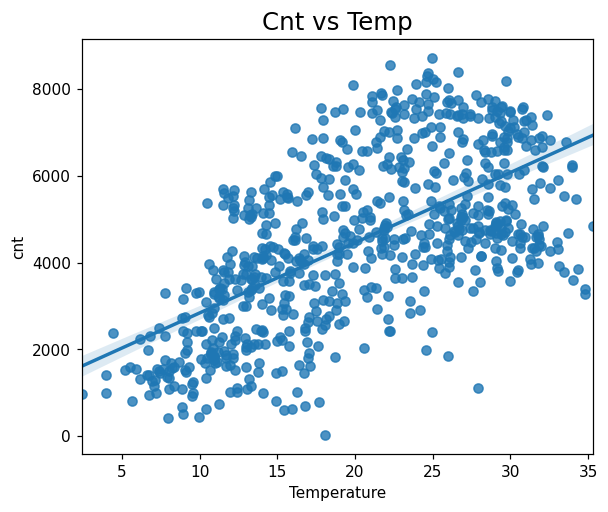

In [24]:
# Analyzing 'cnt' vs 'temp' plot
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=boom_bikes,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

#### OBSERVATION
- Demand for bikes is positively correlated to temp.
- We can see that cnt is linearly increasing with temp indicating linear relation.

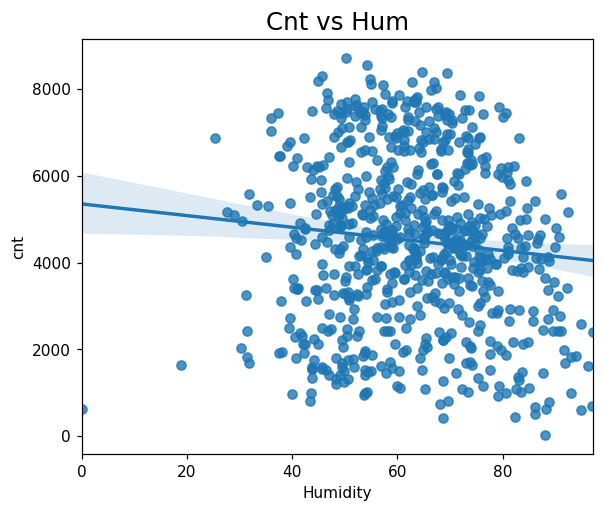

In [25]:
# Analyzing 'cnt' vs 'hum' plot
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=boom_bikes,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

#### OBSERVATION
- Hum is values are more scattered around.
- Although we can see cnt decreasing with increase in humidity.

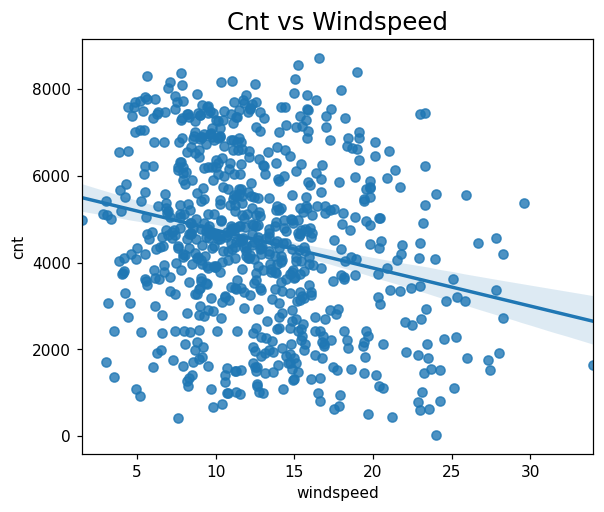

In [26]:
# Analyzing 'cnt' vs 'windspeed' plot
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=boom_bikes,y="cnt",x="windspeed")
plt.show()

#### OBSERVATION
- Windspeed is values are more scattered around.
- Although we can see cnt decreasing with increase in windspeed.

## 5. Model Preparation

### 5.1. Creating dummies for all categorical variables

In [27]:
boom_bikes.shape

(730, 13)

In [28]:
boom_bikes.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old'], dtype='object')

In [29]:
# Creating dummies for categorical variables and dropping the first columns to avoid redundancy
boom_bikes = pd.get_dummies(data=boom_bikes,columns=["season","mnth","weekday"],drop_first=True)
boom_bikes = pd.get_dummies(data=boom_bikes,columns=["weathersit"])
boom_bikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good', 'weathersit_moderate'], dtype='object')

Note: In weathersit first column was not dropped so as to not lose the info about severe weather situation.

In [30]:
boom_bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [31]:
boom_bikes.shape

(730, 32)

## 6. Model Building Preparation

### 6.1. Spliting data into Training and Test dataset

In [32]:
#y to contain only target variable
y=boom_bikes.pop('cnt')

#X is all remaining variables other than target variable 'cnt'
x=boom_bikes

#Train Test split with 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [33]:
# Checking shape and size for train and test sets
print(x_train.shape)
print(x_test.shape)

(511, 31)
(219, 31)


### 6.2. Scaling continuous variables

In [34]:
scaler = MinMaxScaler()

In [35]:
num_vars = ['temp','atemp','hum','windspeed','days_old']
x_train[num_vars] = scaler.fit_transform(x_train[num_vars])

In [36]:
#Inspecting stats for Training set after scaling
x_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.00000,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.698630,0.550874,0.526518,0.654174,0.414873,0.512409,0.230920,0.258317,0.250489,0.074364,0.074364,0.074364,0.088063,0.091977,0.084149,0.062622,0.091977,0.091977,0.09002,0.09002,0.148728,0.142857,0.133072,0.135029,0.156556,0.133072,0.029354,0.624266,0.346380
std,0.500067,0.163398,0.459303,0.227231,0.212976,0.143648,0.185619,0.292268,0.421834,0.438138,0.433719,0.262619,0.262619,0.262619,0.283664,0.289276,0.277883,0.242520,0.289276,0.289276,0.28649,0.28649,0.356169,0.350270,0.339986,0.342090,0.363738,0.339986,0.168963,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.254458,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.521262,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.770233,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
x_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0.936900,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.884774,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.223594,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.493827,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.877915,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1


### 6.3. Eliminating columns using RFE and Automated approach

From above inspection wecan say that some of the features can be eliminated
* First using RFE to eliminate some columns.
* Then if needed we'll eliminate some features manually.

In [38]:
# Building a Linear Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [39]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,15)
rfe.fit(x_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [40]:
#Columns selected by RFE and their weights
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 15),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 13),
 ('season_winter', True, 1),
 ('mnth_aug', False, 4),
 ('mnth_dec', False, 2),
 ('mnth_feb', False, 11),
 ('mnth_jan', False, 7),
 ('mnth_jul', False, 12),
 ('mnth_jun', False, 5),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', False, 3),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 16),
 ('weekday_sun', False, 14),
 ('weekday_thu', False, 17),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 9),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 6)]

### 6.4. Manual Elimination

#### Function to build a model using statsmodel api

In [41]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    x_train_sm = sm.add_constant(x_train[cols])
    lm = sm.OLS(y_train, x_train_sm).fit()
    print(lm.summary())
    return lm

#### Function to calculate VIFs and print them

In [42]:
#Function to calculate VIFs and print them (Takes the columns for which VIF to be calcualted as a parameter)
def get_vif(cols):
    df1 = x_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [43]:
#Print columns selected by RFE. Lets start with these columns for manual elimination
x_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'days_old', 'season_spring', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct', 'mnth_sept', 'weathersit_bad', 'weathersit_good'], dtype='object')

In [44]:
# Features not selected by RFE
x_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_nov', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed', 'weathersit_moderate'], dtype='object')

In [45]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = x_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]

In [46]:
X_train_rfe.shape

(511, 15)

## 7. Building Model

### Model 1 - Start with all variables selected by RFE

In [47]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     165.0
Date:                Wed, 10 Nov 2021   Prob (F-statistic):          1.70e-181
Time:                        21:24:37   Log-Likelihood:                -4134.9
No. Observations:                 511   AIC:                             8302.
Df Residuals:                     495   BIC:                             8370.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2809.2461    

* Checking correlation of features selected by RFE with target column. 
* Also checking impact of different features on target.

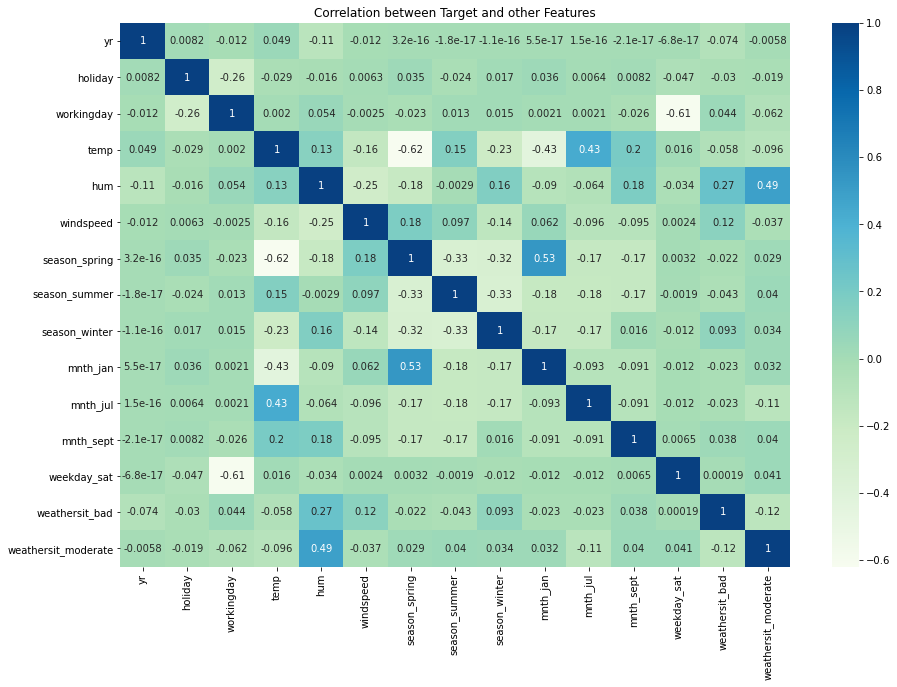

In [48]:
plt.figure(figsize = (15,10))
sns.heatmap(boom_bikes[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']].corr(), cmap='GnBu', annot=True)
plt.title("Correlation between Target and other Features")
plt.show()

### Model 2 - Eliminating mnth_jan

In [49]:
# Dropping the variable mnth_jan as it has negative coefficient and has high p-value. Hence, its insignificant.
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.1
Date:                Wed, 10 Nov 2021   Prob (F-statistic):          1.35e-182
Time:                        21:24:41   Log-Likelihood:                -4135.0
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     496   BIC:                             8363.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2792.2799    

### Model 3 - Eliminating weekday_sat

In [50]:
# Dropping the variable weekday_sat as it has negative coefficient and has high p-value. Hence, its insignificant.
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'hum',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.9
Date:                Wed, 10 Nov 2021   Prob (F-statistic):          1.10e-183
Time:                        21:24:41   Log-Likelihood:                -4135.1
No. Observations:                 511   AIC:                             8298.
Df Residuals:                     497   BIC:                             8358.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2754.1903    

### Model 4 - Checking VIFs

All the columns have p-value > .05 so checking VIFs

In [51]:
# Dropping the variable hum as it has negative coefficient and has high VIF. Hence, its insignificant.
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     199.3
Date:                Wed, 10 Nov 2021   Prob (F-statistic):          2.49e-181
Time:                        21:24:41   Log-Likelihood:                -4143.5
No. Observations:                 511   AIC:                             8313.
Df Residuals:                     498   BIC:                             8368.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1979.6907    

### Model 5 - Eliminating mnth_jul

In [52]:
# Dropping the variable mnth_jul as it has negative coefficient and has high p-value. Hencce, it is insignificant.
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     230.0
Date:                Wed, 10 Nov 2021   Prob (F-statistic):          7.21e-180
Time:                        21:24:41   Log-Likelihood:                -4152.5
No. Observations:                 511   AIC:                             8327.
Df Residuals:                     500   BIC:                             8374.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1824.1269    

### Model 6 - Eliminating windspeed

In [53]:
# Dropping the variable windspeed as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     247.4
Date:                Wed, 10 Nov 2021   Prob (F-statistic):          4.90e-178
Time:                        21:24:41   Log-Likelihood:                -4159.7
No. Observations:                 511   AIC:                             8339.
Df Residuals:                     501   BIC:                             8382.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1422.2933    

#### OBSERVATION
Model 6 has the best outcome i.e.
* Almost all features have zero p value.
* All features have VIF less than 5.
* R- Squared and Adjusted R-Squared have minimal difference.
* F-Statistic is good.

Lets make Model 6 as final model. 

### Final Model

In [54]:
#Building a model with all columns to select features automatically
def build_model_sk(x,y):
    lr1 = LinearRegression()
    lr1.fit(x,y)
    return lr1

In [55]:
#Let us build the finalmodel using sklearn
cols = ['yr', 'workingday', 'temp', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate']

#Build a model with above columns
lr = build_model_sk(x_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1422.2932823832662 [ 1987.54745156  -129.33189018  4107.17854805  -767.43705922
   460.50323904   854.77889983   729.44831961 -2265.69421452
  -667.3274052 ]


In [73]:
lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     247.4
Date:                Wed, 10 Nov 2021   Prob (F-statistic):          4.90e-178
Time:                        22:03:58   Log-Likelihood:                -4159.7
No. Observations:                 511   AIC:                             8339.
Df Residuals:                     501   BIC:                             8382.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1422.2933    

## 8. Model Evaluation

### 8.1. Residual Analysis

In [56]:
y_train_pred = lr.predict(x_train[cols])

In [57]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

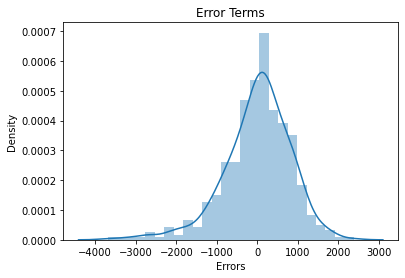

In [58]:
plot_res_dist(y_train, y_train_pred)

#### OBSERVATION
Errors are normally distributed with mean 0. So, everything seems to be fine.

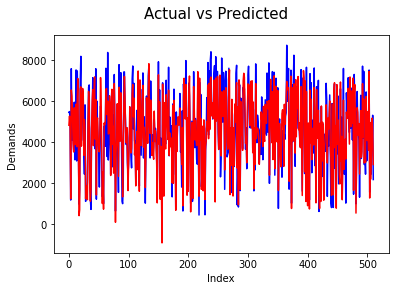

In [59]:
# Actual vs Predicted
c = [i for i in range(0,len(x_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

#### OBSERVATION
Actual and Predicted results are following almost the same pattern so this model is acceptable

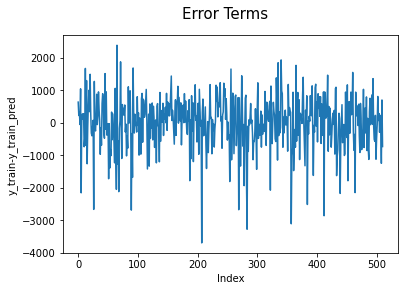

In [60]:
# Error Terms
c = [i for i in range(0,len(x_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

Here, if we see the error terms are independent of each other.

In [61]:
#Printing R-squared Value
r2_score(y_train,y_train_pred)

0.8163091479748136

#### OBSERVATION
R - Squared same as we obtained for the final model.

### 8.2. Linearity Check

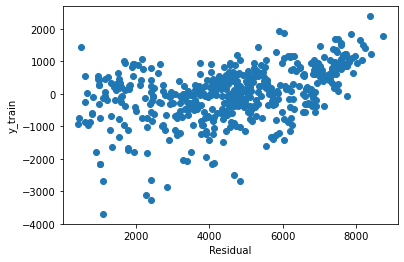

In [62]:
# Scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

### 8.3. Predict values for test data set

In [63]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed','days_old']

#Test data to be transformed only, no fitting
x_test[num_vars] = scaler.transform(x_test[num_vars])

In [64]:
x_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.452055,0.031963,0.671233,0.527468,0.501760,0.629546,0.435511,0.471046,0.283105,0.237443,0.228311,0.109589,0.109589,0.082192,0.077626,0.068493,0.077626,0.136986,0.068493,0.059361,0.073059,0.063927,0.132420,0.141553,0.164384,0.159817,0.114155,0.164384,0.027397,0.657534,0.315068
std,0.498836,0.176306,0.470841,0.229936,0.215759,0.152584,0.212750,0.280674,0.451539,0.426491,0.420705,0.313092,0.313092,0.275286,0.268194,0.253169,0.268194,0.344621,0.253169,0.236840,0.260830,0.245183,0.339723,0.349389,0.371472,0.367276,0.318728,0.371472,0.163612,0.475622,0.465607
min,0.000000,0.000000,0.000000,0.047675,0.051010,0.193646,0.060760,0.002743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.324018,0.314694,0.520479,0.281156,0.240055,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.507811,0.496145,0.608416,0.416900,0.469136,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.726388,0.685028,0.735901,0.534288,0.701646,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.970925,0.939531,1.002146,1.214955,0.995885,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
#Columns from our final model
cols = ['yr', 'workingday', 'temp', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate']

#Predict the values for test data
y_test_pred = lr.predict(x_test[cols])

### 8.4. R-Squared value for test predictions

In [66]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.805814280779098

#### OBSERVATION
Test and prediction R-Squared values are quite close.
This is a good R-squared value. 
Hence, we can say our model is performing good even on unseen data (test data)

Text(0, 0.5, 'y_test_pred')

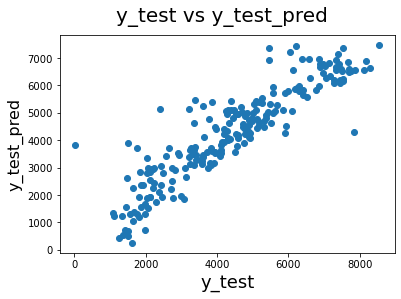

In [67]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)         # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

#### OBSERVATION
We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.

### 8.5. Plotting Test vs Predicted test values

In [68]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

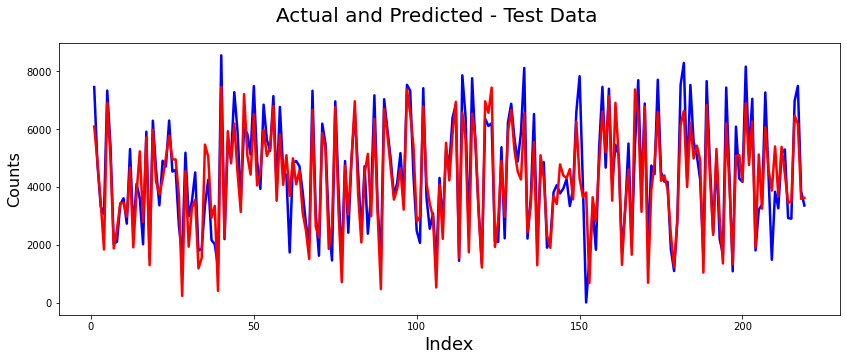

In [69]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

### 8.6. Plot Error Terms for test data

In [70]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label

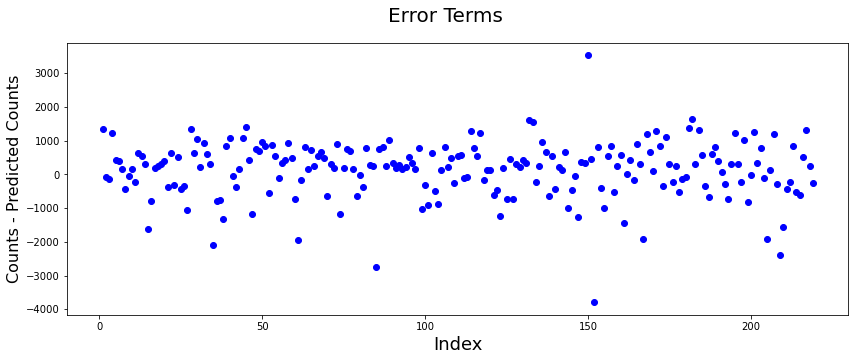

In [71]:
#Plot error terms for test data
plot_err_terms(y_test,y_test_pred)

#### OBSERVATION
As we can see the error terms are randomly distributed and there is no pattern which means the output is explained well by the model.Hence, there are no other parameters that can explain the model better.

## 9. Making Predictions

### 9.1. Interpreting the Model
Let us go with interpreting the RFE with Manual model results as we give more importance to imputation

In [74]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['yr', 'workingday', 'temp', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate']

lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     247.4
Date:                Wed, 10 Nov 2021   Prob (F-statistic):          4.90e-178
Time:                        22:06:18   Log-Likelihood:                -4159.7
No. Observations:                 511   AIC:                             8339.
Df Residuals:                     501   BIC:                             8382.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1422.2933    

### SUMMARY
Analysing the above model, the comapany should focus on the following features:

* Company should focus on expanding business during Spring.
* Company should focus on expanding business during September.
* Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
* There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.

Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.